# Neuroal Network Overfitting

## Task F
- Train a neural net and overﬁt it to cifar. 
- Don't use any regularization. 
- Don't use my crappy implementation, but use keras. Use the train and test splits in the data do evaluate the model.


### Import

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


### Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### Cleaning and Normalization

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Convert class vectors to binary class matrices

In [5]:
# convert class vectors to binary class matrices -> one hot 
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Build Model

In [6]:
#Creating a sequential model
model = Sequential()

#Convolutional layers
model.add( Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', use_bias = 'true', activation = 'relu', input_shape =(32,32,3) ) )

model.add( MaxPooling2D(pool_size=(2,2)) )

model.add( Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'tanh' ) )

model.add( MaxPooling2D(pool_size=(2,2)) )

model.add( Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu' ) )

#Converting data
model.add(Flatten())  

#Fully connected layers

model.add(Dense(units=64, activation='relu'))

#Output layer
model.add(Dense(units=10, activation='softmax'))

#Finalizing and preparing the model for training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Showing the summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dens

### Train Model

In [7]:
train1 = model.fit(x_train, y_train,
          batch_size=500,
          epochs=20,
          verbose=1, #how progress is shown
          validation_data=(x_test, y_test)
         )



Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 55s 1ms/step - loss: 1.7568 - acc: 0.3637 - val_loss: 1.4878 - val_acc: 0.4632
Epoch 2/20
50000/50000 [==============================] - 52s 1ms/step - loss: 1.3446 - acc: 0.5205 - val_loss: 1.2402 - val_acc: 0.5593
Epoch 3/20
50000/50000 [==============================] - 55s 1ms/step - loss: 1.1751 - acc: 0.5846 - val_loss: 1.1230 - val_acc: 0.6006
Epoch 4/20
50000/50000 [==============================] - 52s 1ms/step - loss: 1.0613 - acc: 0.6276 - val_loss: 1.0645 - val_acc: 0.6269
Epoch 5/20
50000/50000 [==============================] - 51s 1ms/step - loss: 0.9878 - acc: 0.6551 - val_loss: 1.0060 - val_acc: 0.6421
Epoch 6/20
50000/50000 [==============================] - 47s 943us/step - loss: 0.9197 - acc: 0.6794 - val_loss: 0.9601 - val_acc: 0.6644
Epoch 7/20
50000/50000 [==============================] - 46s 914us/step - los

In [8]:
train2 = model.fit(x_train, y_train,
          batch_size=250,
          epochs=17,
          verbose=1, #how progress is shown
          validation_data=(x_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/17
50000/50000 [==============================] - 55s 1ms/step - loss: 0.5325 - acc: 0.8117 - val_loss: 0.9059 - val_acc: 0.7062
Epoch 2/17
50000/50000 [==============================] - 55s 1ms/step - loss: 0.4794 - acc: 0.8307 - val_loss: 0.9204 - val_acc: 0.7104
Epoch 3/17
50000/50000 [==============================] - 54s 1ms/step - loss: 0.4308 - acc: 0.8489 - val_loss: 0.9501 - val_acc: 0.7062
Epoch 4/17
50000/50000 [==============================] - 55s 1ms/step - loss: 0.4079 - acc: 0.8561 - val_loss: 0.9683 - val_acc: 0.7146
Epoch 5/17
50000/50000 [==============================] - 55s 1ms/step - loss: 0.3683 - acc: 0.8701 - val_loss: 0.9464 - val_acc: 0.7173
Epoch 6/17
50000/50000 [==============================] - 56s 1ms/step - loss: 0.3305 - acc: 0.8850 - val_loss: 1.0116 - val_acc: 0.7088
Epoch 7/17
50000/50000 [==============================] - 55s 1ms/step - loss: 0.3041 - acc: 0.8933 - val_loss: 0.9928 - val_acc

In [9]:
train3 = model.fit(x_train, y_train,
          batch_size=1028,
          epochs=5,
          verbose=1, #how progress is shown
         validation_data=(x_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 40s 810us/step - loss: 0.0655 - acc: 0.9816 - val_loss: 1.4750 - val_acc: 0.7207
Epoch 2/5
50000/50000 [==============================] - 41s 828us/step - loss: 0.0318 - acc: 0.9955 - val_loss: 1.5099 - val_acc: 0.7232
Epoch 3/5
50000/50000 [==============================] - 41s 815us/step - loss: 0.0258 - acc: 0.9976 - val_loss: 1.5311 - val_acc: 0.7233
Epoch 4/5
50000/50000 [==============================] - 41s 823us/step - loss: 0.0230 - acc: 0.9981 - val_loss: 1.5482 - val_acc: 0.7230
Epoch 5/5
50000/50000 [==============================] - 46s 920us/step - loss: 0.0209 - acc: 0.9985 - val_loss: 1.5704 - val_acc: 0.7243


### Test Model

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5704348169326783
Test accuracy: 0.7243


### Result

Bei jedem Training verbessert sich die accuracy des Trainingssets, jedoch nicht die accuracy des Testsets.
Die 3 Trainings unterscheiden sich in der Anzahl der Epochen und in der größe des Batch Sizes. Durch empirische Untersuchung kamen wir auf die jetzige Zusammensetzung. 
Wir sind mit der Erwartung rangegeangen, dass sich die Batch Size ähnlich wie die Lerning rate beim gradient descent verhält, also größere Batch size führt zu schnellerem Ergebnis aber das Minimum wird nicht erreicht und kleinere Batch Size lernt langsamer aber findet das Minimum. 
Deswegen war unser erster Ansatz mit großen Batch Sizes anzufangen und sie im laufe der Trainings zu verringern.
Ein Tippfehler hat uns jedoch dazu gebracht am Ende wieder eine größere Batch Size zu verwenden und da es gute Ergebnisse gebracht hat haben wir damit fortgesetzt.

In [11]:
a1 = round(train1.history['acc'][-1],2)
v1 = round(train1.history['val_acc'][-1],2)
a2 = round(train2.history['acc'][-1],2)
v2 = round(train2.history['val_acc'][-1],2)
a3 = round(train3.history['acc'][-1],2)
v3 = round(train3.history['val_acc'][-1],2)

In [12]:
print(a1,v1,a2,v2,a3,v3)

0.84 0.71 0.96 0.71 1.0 0.72


In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['1. train', '2. train', '3.train']
accuracy = [a1,a2,a3]
val_accuracy = [v1,v2,v3]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, val_accuracy, width, label='Validation Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by training and dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
train_loss = np.concatenate((train1.history['loss'], train2.history['loss'], train3.history['loss']))
val_loss = np.concatenate((train1.history['val_loss'],train2.history['val_loss'],train3.history['val_loss']))
train_acc = np.concatenate((train1.history['acc'], train2.history['acc'], train3.history['acc']))
val_acc = np.concatenate((train1.history['val_acc'],train2.history['val_acc'],train3.history['val_acc']))

In [15]:
import matplotlib.pyplot as plt
import numpy as np


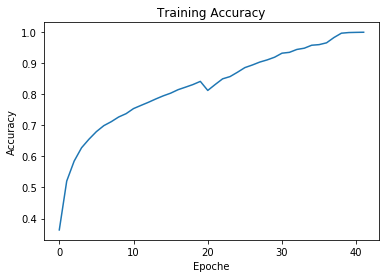

In [16]:
plt.plot(train_acc)
plt.title("Training Accuracy")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.show()

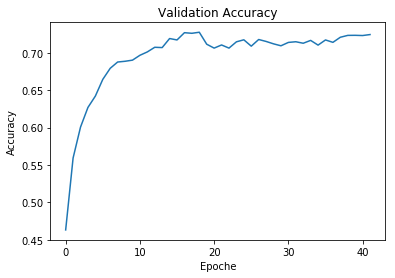

In [17]:
plt.plot(val_acc)
plt.title("Validation Accuracy")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.show()

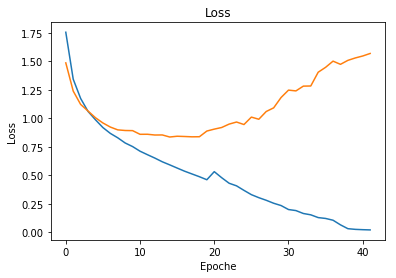

In [18]:

plt.plot(train_loss)
plt.plot(val_loss)
plt.title("Loss")
plt.xlabel("Epoche")
plt.ylabel("Loss")

plt.show()

Beweis für das Overfitting ist hier, dass der loss von val_acc zunächst sinkt, bei weiterem Training sich aber wieder erhöht.
Nach ca. 15 Epochen ist der Validation loss am Geringsten (ca 0.85) und steigt mit weiteren Trainingsepochen wieder an (bis auf ca. 1.58 nach 40 Epochen).
Wie man an den oben dargestellten Graphen erkennen kann, konnten wir genau das Verhalten beobachten, wie auf der Folie in der Vorlesung besprochen (hier anschließend nochmal dargestellt).

<img src="graph_overfitting.JPG" style="width:400px;height:400px"/>